<a href="https://colab.research.google.com/github/Calex192/Desafio-Telecom-X-parte-2.-Alura-Latam./blob/main/Telecom_part2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/Calex192/Desafio-Telecom-X-parte-2.-Alura-Latam./refs/heads/main/datos_tratados.csv"
df = pd.read_csv(url)
df.head()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias
0,0,0,0,1,1,9,1,no,dsl,no,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,yes,dsl,no,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,no,fiber optic,no,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,1,1,1,1,0,13,1,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,1,0,1,1,0,3,1,no,fiber optic,no,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


In [2]:
df.describe()

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,charges.monthly,charges.total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [3]:
df.dtypes

,0
churn,int64
gender,int64
seniorcitizen,int64
partner,int64
dependents,int64
tenure,int64
phoneservice,int64
multiplelines,object
internetservice,object
onlinesecurity,object


In [4]:
df.isnull().sum()

,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [5]:
## 1. Copiar el DataFrame original para no dañar la versión base
df_clean = df.copy()

In [6]:
# 3. One-hot encoding para variables categóricas con más de 2 categorías
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [7]:
# 4. Matriz de correlación con churn
correlacion = df_clean.corr()
## Correlación de todas las variables con churn
churn_corr = correlacion['churn'].sort_values(ascending=False)

print("Variables más correlacionadas con Churn:")
print(churn_corr.head(14))

Variables más correlacionadas con Churn:
churn                             1.000000
internetservice_fiber optic       0.307463
paymentmethod_electronic check    0.301455
cuentas_diarias                   0.192858
charges.monthly                   0.192858
paperlessbilling                  0.191454
seniorcitizen                     0.150541
streamingtv_yes                   0.063254
streamingmovies_yes               0.060860
multiplelines_yes                 0.040033
phoneservice                      0.011691
gender                           -0.008545
multiplelines_no phone service   -0.011691
deviceprotection_yes             -0.066193
Name: churn, dtype: float64


In [8]:
vars_relacionadas = churn_corr.head(14).index.tolist()
print(vars_relacionadas)

['churn', 'internetservice_fiber optic', 'paymentmethod_electronic check', 'cuentas_diarias', 'charges.monthly', 'paperlessbilling', 'seniorcitizen', 'streamingtv_yes', 'streamingmovies_yes', 'multiplelines_yes', 'phoneservice', 'gender', 'multiplelines_no phone service', 'deviceprotection_yes']


In [9]:
X_corr = df_clean[vars_relacionadas]  # Variables independientes seleccionadas
y = df_clean['churn']  # Variable objetivo

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corr)

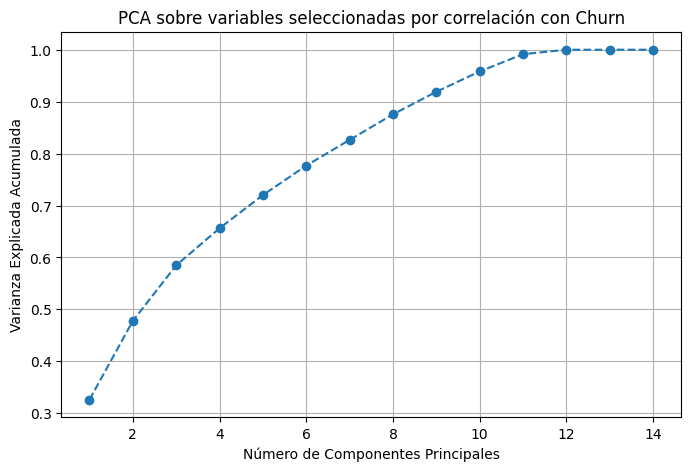

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Inicializamos PCA sin límite de componentes
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('PCA sobre variables seleccionadas por correlación con Churn')
plt.grid()
plt.show()

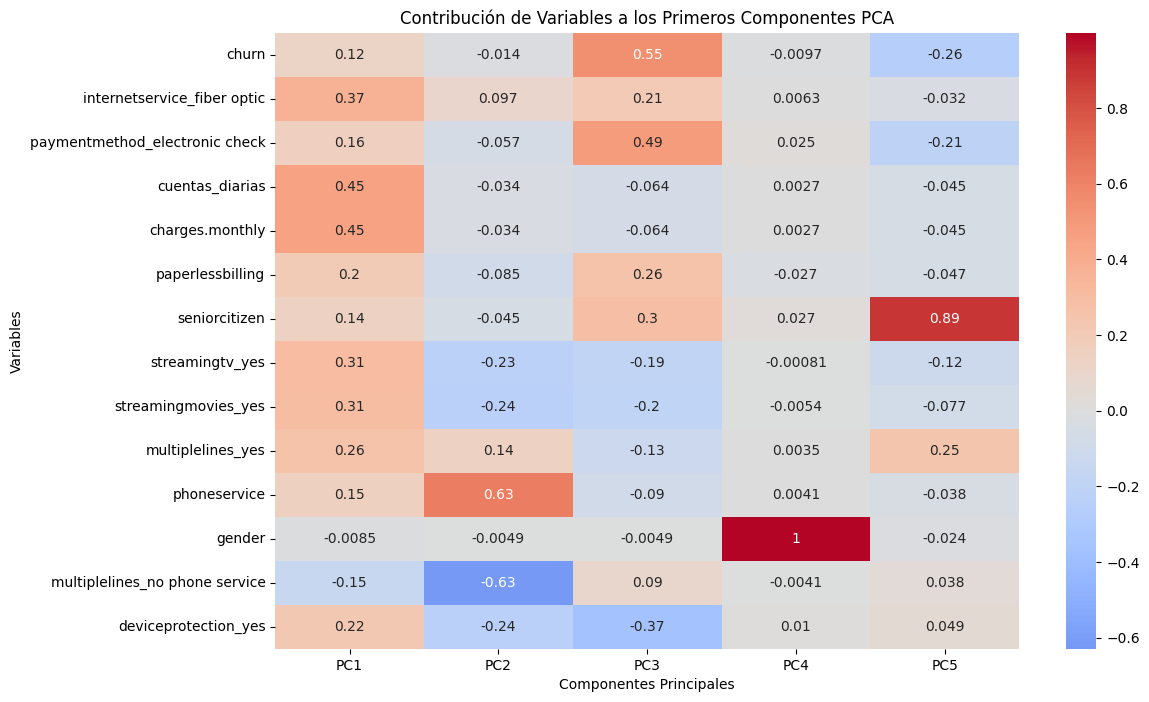

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Seleccionar las 14 variables más correlacionadas con churn
vars_relacionadas = churn_corr.head(14).index.tolist()
X_corr = df_clean[vars_relacionadas]

# 2. Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corr)

# 3. Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Matriz de cargas (qué tanto aporta cada variable a cada componente)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=vars_relacionadas
)

# 5. Graficar el "heatmap" de cargas
plt.figure(figsize=(12, 8))
sns.heatmap(loadings.iloc[:, :5], annot=True, cmap="coolwarm", center=0)  # primeras 5 componentes
plt.title("Contribución de Variables a los Primeros Componentes PCA")
plt.ylabel("Variables")
plt.xlabel("Componentes Principales")
plt.show()

El color indica la fuerza y dirección de la correlación:

🔴 Rojo = correlación positiva (a mayor valor de la variable, mayor probabilidad de churn).

🔵 Azul = correlación negativa (a mayor valor de la variable, menor probabilidad de churn).

Los números dentro de cada celda son los coeficientes de correlación.

El churn está en la primera fila, y se ve cómo se relaciona con las demás variables.

1. Variables más relacionadas con churn

internetservice_fiber optic (0.37)
Los clientes con fibra óptica tienen más probabilidad de churn que los que usan otro tipo de servicio.

charges.monthly (0.45) y cuentas_diarias (0.45)
El costo mensual y el número de cuentas diarias tienen una fuerte relación positiva con churn → clientes que pagan más tienden a irse.

streamingtv_yes (0.31) y streamingmovies_yes (0.31)
Tener servicios de streaming también está asociado con mayor churn.

multiplelines_yes (0.26)
Tener múltiples líneas de teléfono aumenta ligeramente la probabilidad de churn.

paperlessbilling (0.20) y paymentmethod_electronic check (0.16)
Facturación electrónica y pago con cheque electrónico también tienen relación positiva con churn.

seniorcitizen (0.14)
Los adultos mayores muestran una correlación positiva, aunque más débil, con churn.

2. Variables con correlación negativa (protegen contra churn)

deviceprotection_yes (-0.24)
Tener protección de dispositivos reduce la probabilidad de churn.

streamingmovies_yes y streamingtv_yes también tienen componentes negativos en otras dimensiones (cuando se cruzan con PCA).

multiplelines_no phone service (-0.15)
No tener servicio de teléfono se asocia con menor churn.

algunas combinaciones con seniorcitizen y phone service muestran correlación negativa (cuando se cruzan con PCA).

3. Insight final

El churn está más asociado a clientes con fibra óptica, cargos mensuales altos y servicios adicionales como streaming.

En cambio, los clientes con protección de dispositivos o sin líneas múltiples tienden a quedarse.

Variables como género o phone service tienen correlación casi nula → no aportan mucho para predecir churn.

In [14]:
df_clean.columns.tolist()


['churn',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'paperlessbilling',
 'charges.monthly',
 'charges.total',
 'cuentas_diarias',
 'multiplelines_no phone service',
 'multiplelines_yes',
 'internetservice_fiber optic',
 'internetservice_no',
 'onlinesecurity_no internet service',
 'onlinesecurity_yes',
 'onlinebackup_no internet service',
 'onlinebackup_yes',
 'deviceprotection_no internet service',
 'deviceprotection_yes',
 'techsupport_no internet service',
 'techsupport_yes',
 'streamingtv_no internet service',
 'streamingtv_yes',
 'streamingmovies_no internet service',
 'streamingmovies_yes',
 'contract_one year',
 'contract_two year',
 'paymentmethod_credit card (automatic)',
 'paymentmethod_electronic check',
 'paymentmethod_mailed check']

churn                             1.000000
internetservice_fiber optic       0.307463
paymentmethod_electronic check    0.301455
cuentas_diarias                   0.192858
charges.monthly                   0.192858
paperlessbilling                  0.191454
seniorcitizen                     0.150541
streamingtv_yes                   0.063254
streamingmovies_yes               0.060860
multiplelines_yes                 0.040033
phoneservice                      0.011691
gender                           -0.008545
multiplelines_no phone service   -0.011691
deviceprotection_yes    

In [16]:
vars_seleccionadas = ['churn',
 'gender',
 'paymentmethod_electronic check',
 'charges.monthly',
 'paperlessbilling',
 'seniorcitizen',
 'streamingtv_yes',
 'streamingmovies_yes',
 'multiplelines_yes',
 'phoneservice',
 'gender',
 'multiplelines_no phone service',
 'deviceprotection_yes']

In [18]:
df_filtrado = df_clean[vars_seleccionadas].copy()
print("Shape original:", df_clean.shape)
print("Shape reducido:", df_filtrado.shape)
df_clean.head()

Shape original: (7032, 32)
Shape reducido: (7032, 13)


,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,charges.monthly,charges.total,...,techsupport_yes,streamingtv_no internet service,streamingtv_yes,streamingmovies_no internet service,streamingmovies_yes,contract_one year,contract_two year,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1,1,0,0,0,4,1,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1,0,1,1,0,3,1,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True
